## Лабораторная работа 2


*Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
устранение пропусков в данных;
кодирование категориальных признаков;
нормализация числовых признаков.*

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline
sns.set(style="ticks")

In [6]:
data_loaded = pd.read_csv('sample_data/crimes.csv', sep=",")

In [7]:
# размер набора данных
data_loaded.shape

(25648, 12)

In [8]:
data_loaded.head()


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1.0
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1.0
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1.0
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1.0
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1.0


In [14]:
# Создаем список, содержащий признаки, их типы данных и количество пропусков
data_features = list(zip(
    # Признаки
    [i for i in data_loaded.columns],
    zip(
        # Типы колонок
        [str(i) for i in data_loaded.dtypes],
        # Проверим, есть ли пропущенные значения, и вычислим их процентное соотношение к общему количеству данных
        [i for i in data_loaded.isnull().sum()],
        # Процентное соотношение пропущенных значений к общему количеству данных
        [(i / len(data_loaded)) * 100 for i in data_loaded.isnull().sum()]
    )
))
# Выводим признаки с типом данных, количеством пропусков и их процентным соотношением к общему количеству данных
data_features


[('CrimeDate', ('object', 0, 0.0)),
 ('CrimeTime', ('object', 0, 0.0)),
 ('CrimeCode', ('object', 1, 0.003898939488459139)),
 ('Location', ('object', 104, 0.40548970679975044)),
 ('Description', ('object', 1, 0.003898939488459139)),
 ('Inside/Outside', ('object', 93, 0.36260137242669993)),
 ('Weapon', ('object', 16485, 64.27401746724891)),
 ('Post', ('float64', 8, 0.031191515907673113)),
 ('District', ('object', 8, 0.031191515907673113)),
 ('Neighborhood', ('object', 113, 0.44058016219588275)),
 ('Location 1', ('object', 101, 0.3937928883343731)),
 ('Total Incidents', ('float64', 1, 0.003898939488459139))]

In [11]:
# проверим есть ли пропущенные значения
data_loaded.isnull().sum()

CrimeDate              0
CrimeTime              0
CrimeCode              1
Location             104
Description            1
Inside/Outside        93
Weapon             16485
Post                   8
District               8
Neighborhood         113
Location 1           101
Total Incidents        1
dtype: int64

In [15]:
data = data_loaded

# удалим значения
data.dropna(subset=['CrimeCode', 'District', 'Location'], inplace=True)

In [19]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp_df = pd.DataFrame(data=data_imp, columns=['Weapon'])

data['Weapon'] = data_imp_df['Weapon']

In [20]:
# Создаем список, содержащий признаки, их типы данных и количество пропусков
data_features = list(zip(
    # Признаки
    [i for i in data_loaded.columns],
    zip(
        # Типы колонок
        [str(i) for i in data_loaded.dtypes],
        # Проверим, есть ли пропущенные значения, и вычислим их процентное соотношение к общему количеству данных
        [i for i in data_loaded.isnull().sum()],
        # Процентное соотношение пропущенных значений к общему количеству данных
        [(i / len(data_loaded)) * 100 for i in data_loaded.isnull().sum()]
    )
))
# Выводим признаки с типом данных, количеством пропусков и их процентным соотношением к общему количеству данных
data_features


[('CrimeDate', ('object', 0, 0.0)),
 ('CrimeTime', ('object', 0, 0.0)),
 ('CrimeCode', ('object', 0, 0.0)),
 ('Location', ('object', 0, 0.0)),
 ('Description', ('object', 0, 0.0)),
 ('Inside/Outside', ('object', 91, 0.35624804259317255)),
 ('Weapon', ('object', 103, 0.4032258064516129)),
 ('Post', ('float64', 0, 0.0)),
 ('District', ('object', 0, 0.0)),
 ('Neighborhood', ('object', 12, 0.04697776385844034)),
 ('Location 1', ('object', 0, 0.0)),
 ('Total Incidents', ('float64', 0, 0.0))]

# кодирование категориальных признаков;

```
# Выбран кодовый формат
```



One-hot encoding предполагает, что значение категории заменяется на отдельную колонку, которая содержит бинарные значения.


In [22]:
dummies = pd.get_dummies(data[['Weapon']])

dummies = dummies.astype(int)

print(dummies.head())

   Weapon_FIREARM  Weapon_HANDS  Weapon_KNIFE  Weapon_OTHER
0               0             1             0             0
1               1             0             0             0
2               0             1             0             0
3               0             1             0             0
4               0             1             0             0


# Масштабирование;

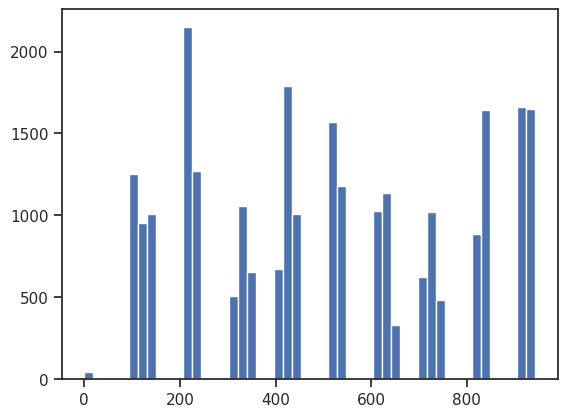

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Post']])
plt.hist(data['Post'], 50)
plt.show()

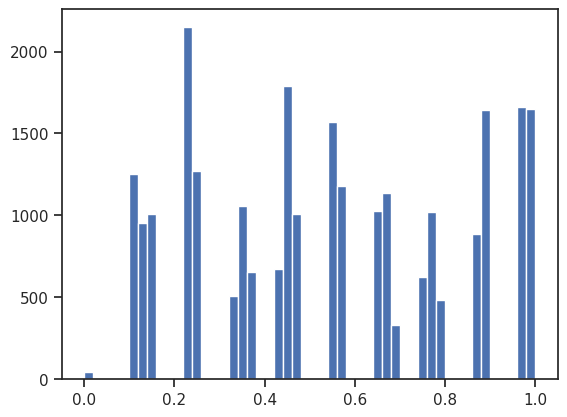

In [26]:
plt.hist(sc1_data, 50)
plt.show()